<a href="https://colab.research.google.com/github/HannaPo/ML-zoomcamp/blob/master/homework_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.__version__

'1.5.3'

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2023-09-17 08:23:55--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2023-09-17 08:23:56 (24.3 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
print("Number of columns are {}".format(len(df.columns)))

Number of columns are 10


In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
df['ocean_proximity'].str.lower().str.replace(' ', '_')

0        near_bay
1        near_bay
2        near_bay
3        near_bay
4        near_bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20640, dtype: object

In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [24]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28]
844

latitude
[37.88 37.86 37.85 37.84 37.83 37.82 37.81]
862

housing_median_age
[41. 21. 52. 42. 50. 40. 49.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.  919. 2535.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.  213.  489.]
1923

population
[ 322. 2401.  496.  558.  565.  413. 1094.]
3888

households
[ 126. 1138.  177.  219.  259.  193.  514.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200. 269700. 299200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [13]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,near_bay
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,near_bay
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,near_bay
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,near_bay
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,near_ocean
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,near_ocean
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1h_ocean
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1h_ocean


In [33]:
print("Сolumns with missing data: \n{}".format(df.isnull().sum()))

Сolumns with missing data: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

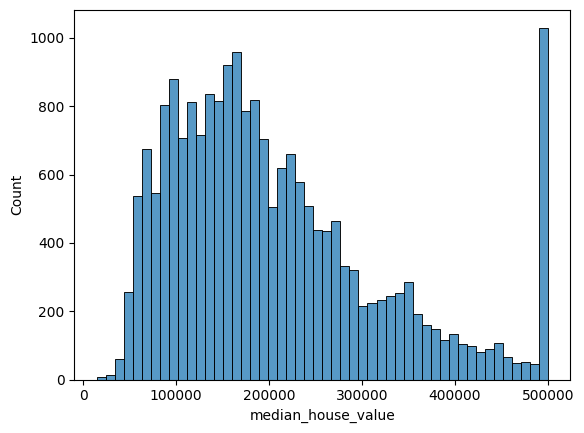

In [16]:
sns.histplot(df.median_house_value, bins=50)

In [17]:
median_price_logs = np.log1p(df.median_house_value)
median_price_logs

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

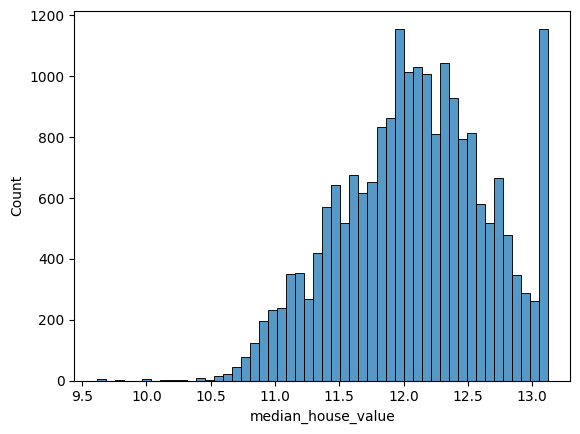

In [26]:
sns.histplot(median_price_logs, bins=50)

In [22]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64